# Active Galactic Neuclei
## Final Project

### MASS Semester 2
Shoaib Jamal Shamsi

## Task 1
The first project task is to extract top 30,000 galaxies with narrow emission lines with redshift $z<0.35$ from the SDSS database (e.g., DR17 or DR18 –http://www.sdss.org/) using the SQL search and produce BPT diagram.

In [1]:
from astroquery.sdss import SDSS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
query_str = """SELECT TOP 30000
    s.specobjid, s.z, g.oi_6300_flux, g.oiii_5007_flux, g.nii_6584_flux, g.nii_6584_eqw,
    g.sii_6717_flux, g.sii_6731_flux, g.h_alpha_flux, g.h_alpha_eqw, g.h_beta_flux
    

FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid

WHERE
    (s.class = 'QSO' OR s.class = 'GALAXY')
AND s.z < 0.35
AND g.sigma_forbidden < 500/2.335
AND g.oi_6300_flux > 0
AND g.oiii_5007_flux > 0
AND g.nii_6584_flux > 0
AND g.sii_6717_flux > 0
AND g.sii_6731_flux > 0
AND g.h_alpha_flux / g.h_alpha_flux_err > 5
AND g.h_beta_flux / g.h_beta_flux_err > 5
AND g.oi_6300_flux / g.oi_6300_flux_err > 5
AND g.oiii_5007_flux / g.oiii_5007_flux_err > 5
AND g.nii_6584_flux / g.nii_6584_flux_err > 5
AND g.sii_6717_flux / g.sii_6717_flux_err > 5
AND g.sii_6731_flux / g.sii_6731_flux_err > 5"""


gal_df = SDSS.query_sql(query_str).to_pandas()
gal_df.head()

,specobjid,z,oi_6300_flux,oiii_5007_flux,nii_6584_flux,nii_6584_eqw,sii_6717_flux,sii_6731_flux,h_alpha_flux,h_alpha_eqw,h_beta_flux
0,299499298171676672,0.048086,19.59912,55.35548,367.87630,-10.877340,80.13560,70.84364,510.6647,-15.40855,91.71097
1,299518814503069696,0.123199,24.92998,34.62197,256.07290,-10.849480,101.18960,75.75684,555.7532,-23.83372,111.30090
2,299519089380976640,0.035808,33.85272,210.51950,359.10240,-12.522310,256.09650,182.80830,1311.7880,-46.32598,333.19610
3,299532558398416896,0.021758,59.05846,780.11430,465.84510,-11.588670,430.35350,299.65790,2292.5280,-56.84101,638.05270
4,299569117160040448,0.118615,12.11208,28.04560,68.26641,-5.094373,33.76559,26.44269,133.9965,-10.12710,32.09054


### Task (a)
Obtain the following line fluxes $[O III]~\lambda 5007$, $H\beta$, $[N II]~\lambda6583$, $H\alpha$, $[S II]~\lambda6716$, $\lambda6731$, $[O I]~\lambda6300$, and equivalent width of $H\alpha$ from the SDSS spectral databases (tips: when selecting galaxies define as one of the criteria that you only need narrow emission line; find a way to calculate line fluxes using only data available in SDSS tables). For the division line use the theoretical curves obtained by Kewley et al. (2001) and empirical curves from Kauffman et al. (2003). Make plots for $[O III]~\lambda 5007 / H\beta$ vs. $[N II]~\lambda6583 / H\alpha$, denoting with different marks/colors different object (e.g., as shown in Figure 5 below).

<div>
<img src="figure5.png" width="500"/>
</div>

Let's create out BPT diagram! We will create columns for the rations we wish to plot, create functions from Kewley et. al. (2001) and Kauffmann et. al. (2003), and them display them together.

In [3]:
### Creating columns for line flux rations in our dataframe.

gal_df['log_oiii/hb'] = gal_df.apply(lambda row: np.log10(row.oiii_5007_flux / row.h_beta_flux), axis=1)
gal_df['log_nii/ha'] = gal_df.apply(lambda row: np.log10(row.nii_6584_flux / row.h_alpha_flux), axis=1)

gal_df.head()

,specobjid,z,oi_6300_flux,oiii_5007_flux,nii_6584_flux,nii_6584_eqw,sii_6717_flux,sii_6731_flux,h_alpha_flux,h_alpha_eqw,h_beta_flux,log_oiii/hb,log_nii/ha
0,299499298171676672,0.048086,19.59912,55.35548,367.87630,-10.877340,80.13560,70.84364,510.6647,-15.40855,91.71097,-0.219261,-0.142434
1,299518814503069696,0.123199,24.92998,34.62197,256.07290,-10.849480,101.18960,75.75684,555.7532,-23.83372,111.30090,-0.507147,-0.336518
2,299519089380976640,0.035808,33.85272,210.51950,359.10240,-12.522310,256.09650,182.80830,1311.7880,-46.32598,333.19610,-0.199408,-0.562645
3,299532558398416896,0.021758,59.05846,780.11430,465.84510,-11.588670,430.35350,299.65790,2292.5280,-56.84101,638.05270,0.087302,-0.692073
4,299569117160040448,0.118615,12.11208,28.04560,68.26641,-5.094373,33.76559,26.44269,133.9965,-10.12710,32.09054,-0.058512,-0.292886


In [4]:
### Here we add demarkation line functions from Kewley et. al. (2001) and Kauffmann et. al. (2003)

def kewley2001_curve(log_nii_ha):
    if log_nii_ha > 0.469:
        log_nii_ha = 0.469
    
    log_oiii_hb = (0.61 / (log_nii_ha - 0.47)) + 1.19
    return log_oiii_hb

def kauffmann_curve(log_nii_ha):
    if log_nii_ha > 0.049:
        log_nii_ha = 0.049
    
    log_oiii_hb = (0.61 / (log_nii_ha - 0.05)) + 1.3
    return log_oiii_hb


### Let's add a classification function to assign a class to our dataframe rows, and then apply it.
def classifier(log_nii_ha, log_oiii_hb):
    if log_oiii_hb < kauffmann_curve(log_nii_ha):
        return 'Galaxy'
    if log_oiii_hb > kewley2001_curve(log_nii_ha):
        return 'AGN'
    return 'Composite'

gal_df['Classification'] = gal_df.apply(lambda row: classifier(row['log_nii/ha'], row['log_oiii/hb']), axis=1)
gal_df.head()

,specobjid,z,oi_6300_flux,oiii_5007_flux,nii_6584_flux,nii_6584_eqw,sii_6717_flux,sii_6731_flux,h_alpha_flux,h_alpha_eqw,h_beta_flux,log_oiii/hb,log_nii/ha,Classification
0,299499298171676672,0.048086,19.59912,55.35548,367.87630,-10.877340,80.13560,70.84364,510.6647,-15.40855,91.71097,-0.219261,-0.142434,Composite
1,299518814503069696,0.123199,24.92998,34.62197,256.07290,-10.849480,101.18960,75.75684,555.7532,-23.83372,111.30090,-0.507147,-0.336518,Galaxy
2,299519089380976640,0.035808,33.85272,210.51950,359.10240,-12.522310,256.09650,182.80830,1311.7880,-46.32598,333.19610,-0.199408,-0.562645,Galaxy
3,299532558398416896,0.021758,59.05846,780.11430,465.84510,-11.588670,430.35350,299.65790,2292.5280,-56.84101,638.05270,0.087302,-0.692073,Galaxy
4,299569117160040448,0.118615,12.11208,28.04560,68.26641,-5.094373,33.76559,26.44269,133.9965,-10.12710,32.09054,-0.058512,-0.292886,Composite


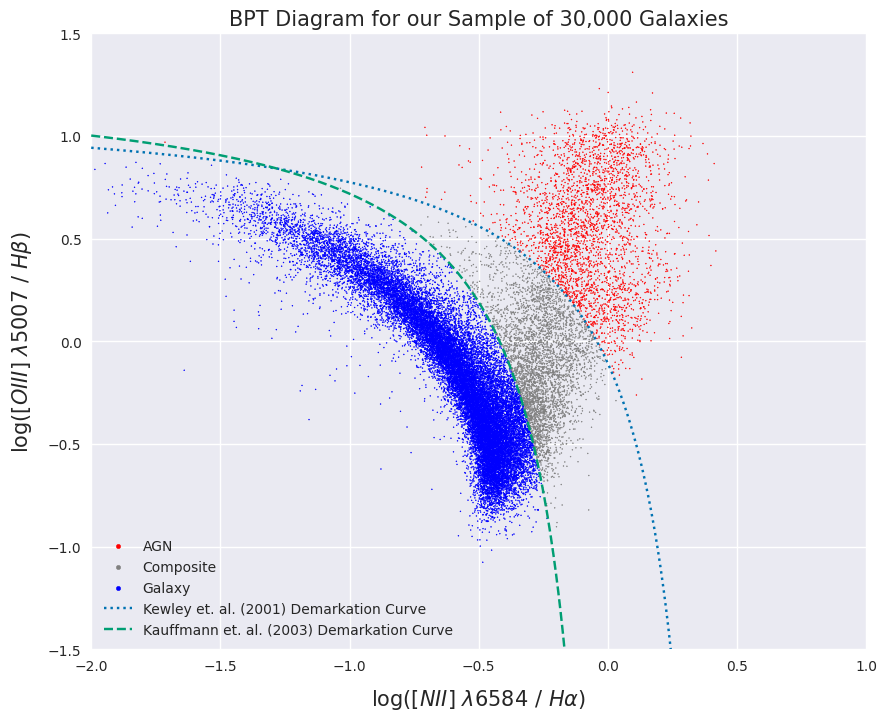

In [5]:
# Assigning each row in our DF a colour based on its classification
color_dict = {'AGN': 'red', 'Composite': 'gray', 'Galaxy': 'blue'}
colors = [color_dict[classification] for classification in gal_df['Classification']]

plt.figure(figsize=(10,8))

plt.scatter(gal_df['log_nii/ha'], gal_df['log_oiii/hb'], c=colors, s=0.5)

# These points are only for plt.legend purposes. IDK a more elegant way to do this. 
plt.scatter([-10], [-10], c='red', s=10, label='AGN')
plt.scatter([-10], [-10], c='gray', s=10, label='Composite')
plt.scatter([-10], [-10], c='blue', s=10, label='Galaxy')

xmin, xmax = -2, 1
ymin, ymax = -1.5, 1.5
x = np.linspace(xmin, xmax, 1000)

# Getting Kewley and Kauffmann log_oiii/hb values based on input log_nii/ha values using our functions.
kewley2001_y = [kewley2001_curve(log_nii_ha) for log_nii_ha in x]
kauffmann_y = [kauffmann_curve(log_nii_ha) for log_nii_ha in x]

plt.plot(x, kewley2001_y, ':', label='Kewley et. al. (2001) Demarkation Curve')
plt.plot(x, kauffmann_y, '--', label='Kauffmann et. al. (2003) Demarkation Curve')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel(r'$\log([NII]~\lambda 6584~/~H \alpha)$', size=15, labelpad=10)
plt.ylabel(r'$\log([OIII]~\lambda 5007~/~H \beta)$', size=15, labelpad=10)

plt.title('BPT Diagram for our Sample of 30,000 Galaxies', size=15)

plt.legend()
plt.show()

### Task (b)
Test is there a cosmic evolution of the BPT diagram (see e.g., Kewley et a. 2013) by plotting the BPT diagrams for different redshift bins (e.g., $\Delta z = 0.05$ or $0.1$). Could you notice the change in the distribution of objects across the BPT plane? How would you explain this cosmic evolution? Think of another way to present (and compare) distributions of different sub-samples.

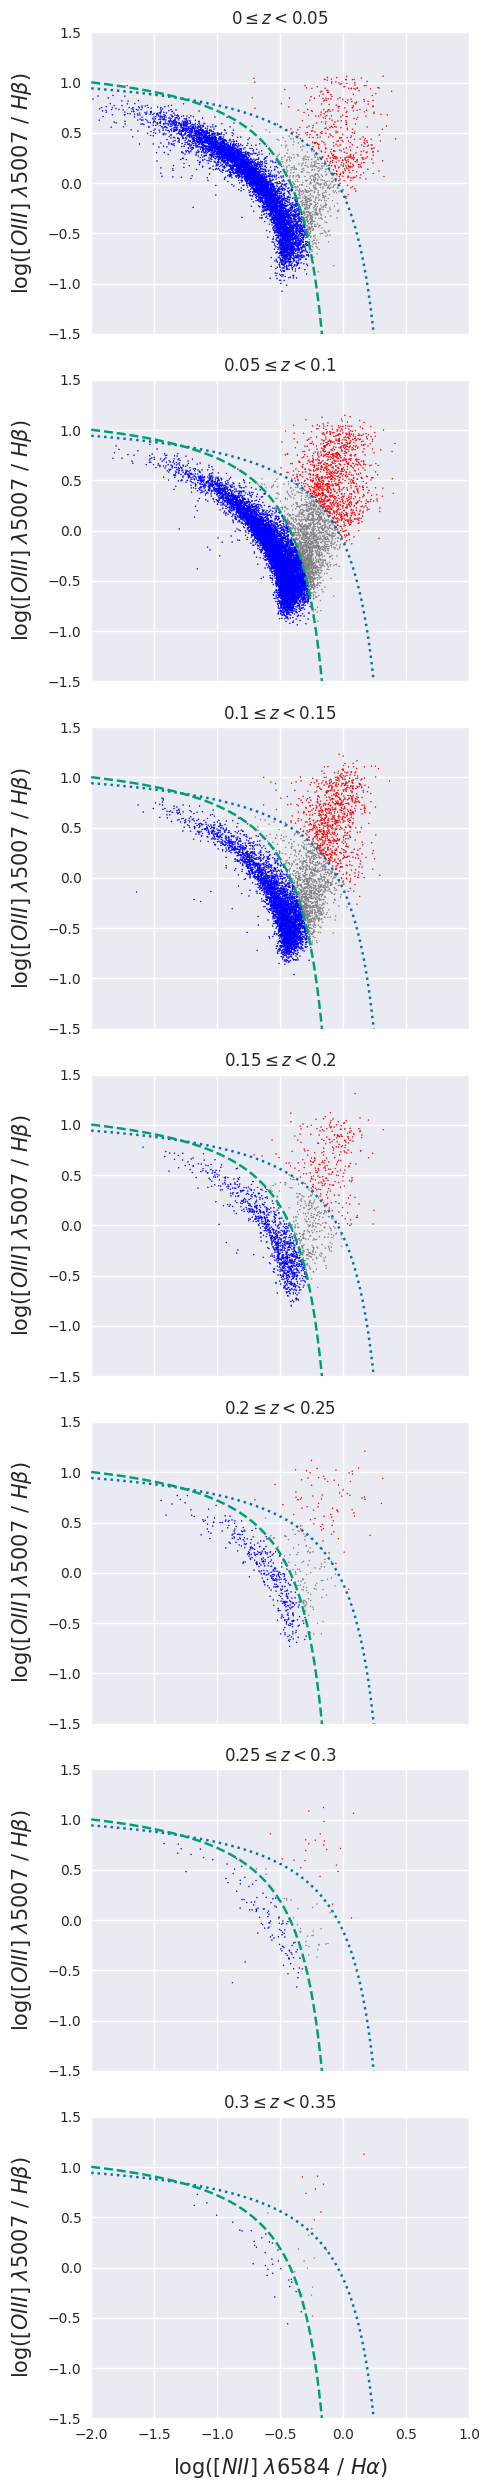

In [6]:
### Let's create different redshift bins with Dz = 0.05 (corresponds to 7 bins. You can change that by changing nbind below).
nbins = 7
z_interval = 0.35 / nbins

gal_df['z_bin'] = pd.cut(gal_df['z'], bins=nbins, labels=range(1, nbins + 1))

## Now let's plot them
fig, axs = plt.subplots(nrows=nbins, ncols=1, tight_layout=True, figsize=(5, (25/7) * nbins), sharex=True)

for i, ax in enumerate(axs):
    df = gal_df[gal_df['z_bin'] == i+1]
    colors = [color_dict[classification] for classification in df['Classification']]
    
    ax.scatter(df['log_nii/ha'], df['log_oiii/hb'], c=colors, s=0.5)
    
    ax.plot(x, kewley2001_y, ':')
    ax.plot(x, kauffmann_y, '--')
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    ax.set_ylabel(r'$\log([OIII]~\lambda 5007~/~H \beta)$', size=15, labelpad=10)
    ax.set_title('${0:.2g} \\leq z < {1:.2g}$'.format(i * z_interval, (i + 1) * z_interval))

ax.set_xlabel(r'$\log([NII]~\lambda 6584~/~H \alpha)$', size=15, labelpad=10)
plt.show()

From the the diagrams, it is possible to see that the number distribution of galaxies follow some kind of normal distribution, with the most galaxies being observed in the $0.05 \leq z < 0.1$ bin. Let's qualify this statement with a $z$ distribution curve.

/tmp/ipykernel_218702/509732848.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


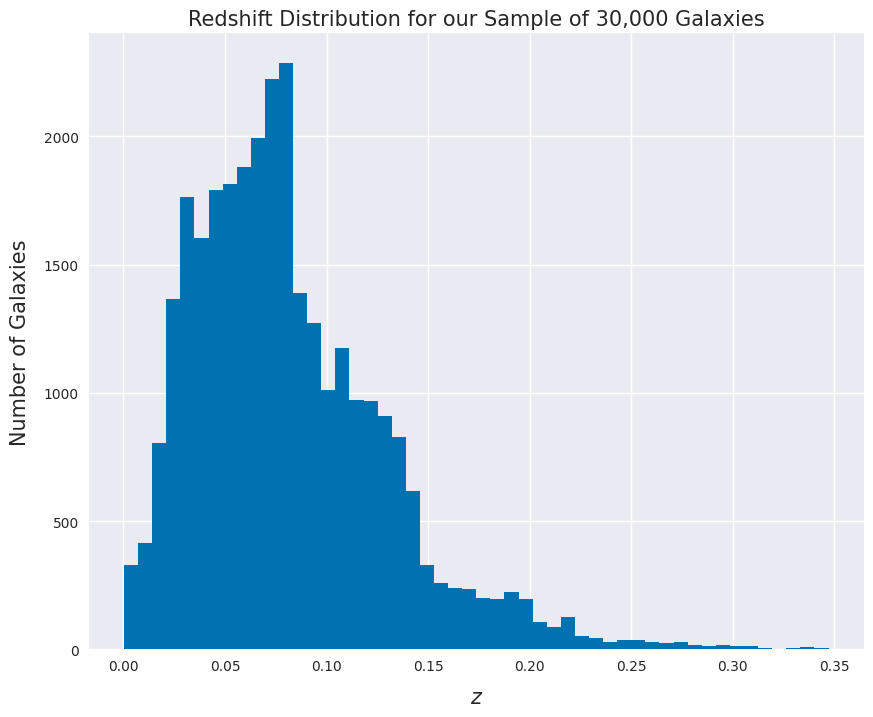

In [7]:
plt.figure(figsize=(10,8))

plt.hist(gal_df['z'], bins=50)

plt.xlabel('$z$', size=15 , labelpad=10)
plt.ylabel('Number of Galaxies', size=15, labelpad=10)

plt.title('Redshift Distribution for our Sample of 30,000 Galaxies', size=15)

plt.legend()
plt.show()

It isn't surprising to see our galaxy distribution to be a kind of skewed Gaussian distribution. Lower $z$ means less local volume (there just aren't too many QSOs nearby) while high $z$ galaxies might be too obscured/simply too far away for us to resolve their lines. However if this distribution still shows this behaviour after being corrected for observational biases, this may tell us somehting about how galaxies emit differently as they age. Perhaps $z \sim 0.08$ old galaxies are the most likely to emit observable narrow lines.

To see this in another way, we will plot the ratios of AGNs/Composites/Galaxies to the total number of galaxies in that redshift bin as a bar graph with redshift bins. The graph below may suggest a star forming to composite to AGN type evolution as time goes by.

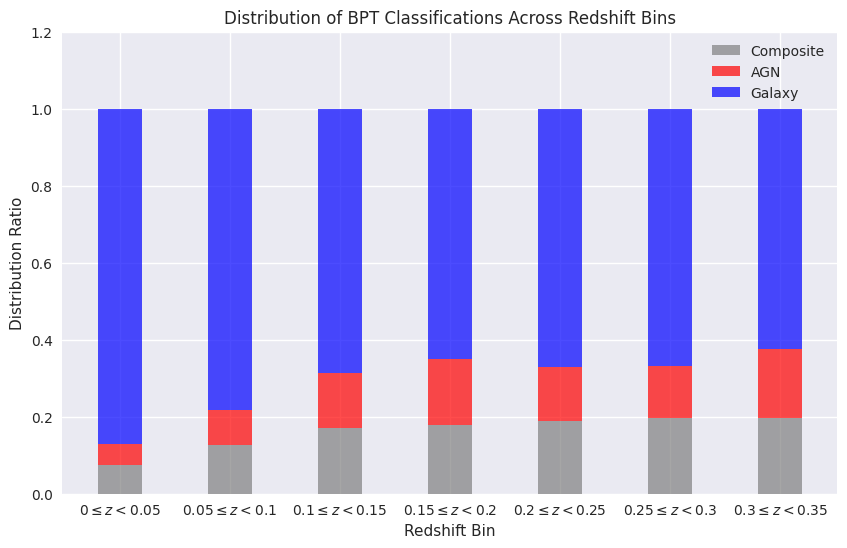

In [8]:
### Let's create different redshift bins with Dz = 0.05 (corresponds to 7 bins. You can change that by changing nbind below).

nbins = 7
z_interval = 0.35 / nbins
gal_df['z_bin'] = pd.cut(gal_df['z'], bins=nbins, labels=range(1, nbins + 1))

galaxy_ratios = []
agn_ratios = []
composite_ratios = []

for i in range(nbins):
    df = gal_df[gal_df['z_bin'] == i+1]
    
    composite_ratio = df['Classification'].value_counts()['Composite'] / df['Classification'].size
    agn_ratio = df['Classification'].value_counts()['AGN'] / df['Classification'].size
    galaxy_ratio = df['Classification'].value_counts()['Galaxy'] / df['Classification'].size

    composite_ratios.append(composite_ratio)
    agn_ratios.append(agn_ratio)
    galaxy_ratios.append(galaxy_ratio)
    
galaxy_ratios = np.array(galaxy_ratios)
agn_ratios = np.array(agn_ratios)
composite_ratios = np.array(composite_ratios)

bin_labels = ['${0:.2g} \\leq z < {1:.2g}$'.format(i * z_interval, (i + 1) * z_interval) for i in range(nbins)]

plt.figure(figsize=(10, 6))

plt.bar(bin_labels, composite_ratios, .4, label='Composite', color='gray', alpha=0.7)
plt.bar(bin_labels, agn_ratios, .4, bottom=composite_ratios, label='AGN', color='red', alpha=0.7)
plt.bar(bin_labels, galaxy_ratios, .4, bottom=composite_ratios+agn_ratios, label='Galaxy', color='blue', alpha=0.7)

# # Add labels, title, and legend
plt.xlabel('Redshift Bin')
plt.ylabel('Distribution Ratio')
plt.ylim(0,1.2)
plt.title('Distribution of BPT Classifications Across Redshift Bins')
plt.legend()
plt.show()

### Task (c)
Test the classification obtained using the first BPT diagnostics $[O III]~\lambda 5007 / H\beta$ vs. $[N II]~\lambda6583 / H\alpha$, with the other two common BPT diagnostic tools:

1) $[O III]~\lambda 5007 / H\beta$ vs. $[SII]~\lambda 6716$, $\lambda 6731$/$H\alpha$,
2) $[O III]~\lambda 5007 / H\beta$ vs. $[OI]~\lambda 6300$/$H\alpha$.

(Tip: use the same mark/color notation as for the first diagnostic in order to be able to make comparison).

1) $[O III]~\lambda 5007 / H\beta$ vs. $[SII]~\lambda 6716$, $\lambda 6731$/$H\alpha$ Diagram.

In [9]:
# Add the [SII]λλ6716,6731/Ha column to df
gal_df['log_sii/ha'] = gal_df.apply(lambda row: np.log10(row.sii_6717_flux / row.h_alpha_flux), axis=1)

# BPT diagram - [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα function
def kewley2001_sii_curve(log_sii_ha):
    if log_sii_ha > 0.32:
        log_sii_ha = 0.319
        
    log_oiii_hb = 0.72 / (log_sii_ha - 0.32) + 1.30
    return log_oiii_hb 

### Let's add a classifier for this function and apply it.
def sii_classifier(log_sii_ha, log_oiii_hb):
    if log_oiii_hb > kewley2001_sii_curve(log_sii_ha):
        return 'AGN'
    return 'Galaxy'

gal_df['Sii_Classification'] = gal_df.apply(lambda row: sii_classifier(row['log_sii/ha'], row['log_oiii/hb']), axis=1)
gal_df.head()

,specobjid,z,oi_6300_flux,oiii_5007_flux,nii_6584_flux,nii_6584_eqw,sii_6717_flux,sii_6731_flux,h_alpha_flux,h_alpha_eqw,h_beta_flux,log_oiii/hb,log_nii/ha,Classification,z_bin,log_sii/ha,Sii_Classification
0,299499298171676672,0.048086,19.59912,55.35548,367.87630,-10.877340,80.13560,70.84364,510.6647,-15.40855,91.71097,-0.219261,-0.142434,Composite,1,-0.804310,Galaxy
1,299518814503069696,0.123199,24.92998,34.62197,256.07290,-10.849480,101.18960,75.75684,555.7532,-23.83372,111.30090,-0.507147,-0.336518,Galaxy,3,-0.739746,Galaxy
2,299519089380976640,0.035808,33.85272,210.51950,359.10240,-12.522310,256.09650,182.80830,1311.7880,-46.32598,333.19610,-0.199408,-0.562645,Galaxy,1,-0.709460,Galaxy
3,299532558398416896,0.021758,59.05846,780.11430,465.84510,-11.588670,430.35350,299.65790,2292.5280,-56.84101,638.05270,0.087302,-0.692073,Galaxy,1,-0.726489,Galaxy
4,299569117160040448,0.118615,12.11208,28.04560,68.26641,-5.094373,33.76559,26.44269,133.9965,-10.12710,32.09054,-0.058512,-0.292886,Composite,3,-0.598619,Galaxy


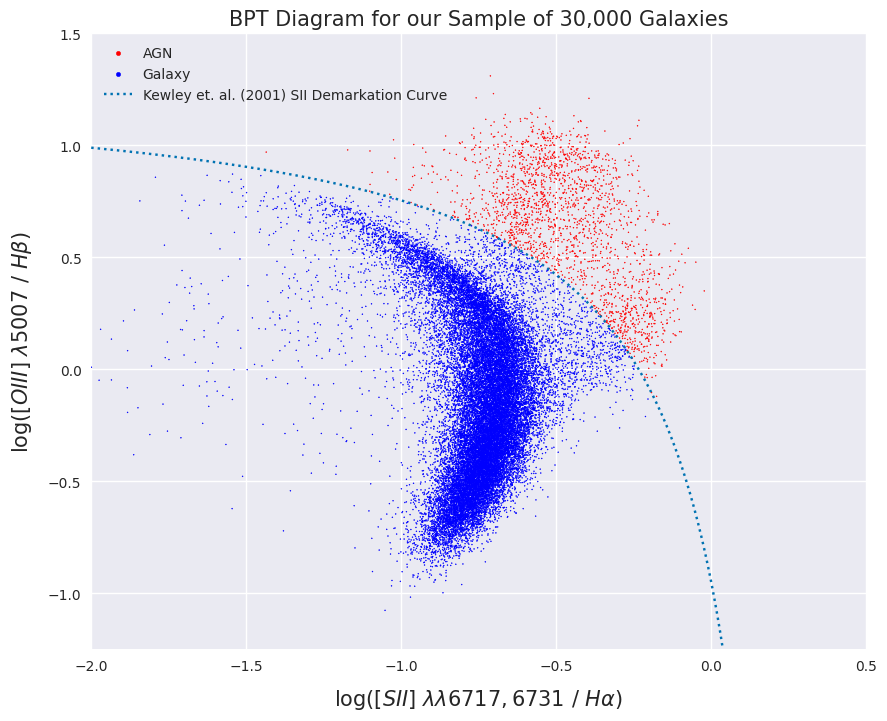

In [10]:
sii_colours = [color_dict[classification] for classification in gal_df['Sii_Classification']]

plt.figure(figsize=(10,8))

plt.scatter(gal_df['log_sii/ha'], gal_df['log_oiii/hb'], c=sii_colours, s=0.5)

# These points are only for plt.legend purposes. IDK a more elegant way to do this. 
plt.scatter([-10], [-10], c='red', s=10, label='AGN')
plt.scatter([-10], [-10], c='blue', s=10, label='Galaxy')

xmin, xmax = -2, 0.5
ymin, ymax = -1.25, 1.5
x = np.linspace(xmin, xmax, 1000)

# Getting Kewley SII values based on input log_sii/ha values using our functions.
kewley2001_sii_y = [kewley2001_sii_curve(log_sii_ha) for log_sii_ha in x]

plt.plot(x, kewley2001_sii_y, ':', label='Kewley et. al. (2001) SII Demarkation Curve')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel(r'$\log([SII]~\lambda \lambda 6717,6731~/~H \alpha)$', size=15, labelpad=10)
plt.ylabel(r'$\log([OIII]~\lambda 5007~/~H \beta)$', size=15, labelpad=10)

plt.title('BPT Diagram for our Sample of 30,000 Galaxies', size=15)

plt.legend()
plt.show()

In [11]:
print('The SII classification has',
      round(gal_df['Sii_Classification'].value_counts()['AGN'] / gal_df['Classification'].value_counts()['AGN'], 3),
      'times the AGN classifications as the NII classification.')
print('The SII classification has',
      round(gal_df['Sii_Classification'].value_counts()['Galaxy'] / gal_df['Classification'].value_counts()['Galaxy'], 3),
      'times the SF Galaxy classifications as the NII classification.')

The SII classification has 0.686 times the AGN classifications as the NII classification.
The SII classification has 1.202 times the SF Galaxy classifications as the NII classification.


2) $[O III]~\lambda 5007 / H\beta$ vs. $[OI]~\lambda 6300$/$H\alpha$ Diagram.

In [12]:
# Add the [OI]λ6300/Ha column to df
gal_df['log_oi/ha'] = gal_df.apply(lambda row: np.log10(row.oi_6300_flux / row.h_alpha_flux), axis=1)

# BPT diagram - [OIII]λ5007/Hβ vs. [OI]λ6300/Hα function
def kewley2001_oi_curve(log_oi_ha):
    if log_oi_ha > -0.6:
        log_oi_ha = -0.61
    
    log_oiii_hb = (0.73 / (log_oi_ha + 0.59)) + 1.33
    return log_oiii_hb

### Let's add a classifier for this function and apply it.
def oi_classifier(log_oi_ha, log_oiii_hb):
    if log_oiii_hb > kewley2001_oi_curve(log_oi_ha):
        return 'AGN'
    return 'Galaxy'

gal_df['Oi_Classification'] = gal_df.apply(lambda row: oi_classifier(row['log_oi/ha'], row['log_oiii/hb']), axis=1)
gal_df.head()

,specobjid,z,oi_6300_flux,oiii_5007_flux,nii_6584_flux,nii_6584_eqw,sii_6717_flux,sii_6731_flux,h_alpha_flux,h_alpha_eqw,h_beta_flux,log_oiii/hb,log_nii/ha,Classification,z_bin,log_sii/ha,Sii_Classification,log_oi/ha,Oi_Classification
0,299499298171676672,0.048086,19.59912,55.35548,367.87630,-10.877340,80.13560,70.84364,510.6647,-15.40855,91.71097,-0.219261,-0.142434,Composite,1,-0.804310,Galaxy,-1.415899,Galaxy
1,299518814503069696,0.123199,24.92998,34.62197,256.07290,-10.849480,101.18960,75.75684,555.7532,-23.83372,111.30090,-0.507147,-0.336518,Galaxy,3,-0.739746,Galaxy,-1.348160,Galaxy
2,299519089380976640,0.035808,33.85272,210.51950,359.10240,-12.522310,256.09650,182.80830,1311.7880,-46.32598,333.19610,-0.199408,-0.562645,Galaxy,1,-0.709460,Galaxy,-1.588270,Galaxy
3,299532558398416896,0.021758,59.05846,780.11430,465.84510,-11.588670,430.35350,299.65790,2292.5280,-56.84101,638.05270,0.087302,-0.692073,Galaxy,1,-0.726489,Galaxy,-1.589033,Galaxy
4,299569117160040448,0.118615,12.11208,28.04560,68.26641,-5.094373,33.76559,26.44269,133.9965,-10.12710,32.09054,-0.058512,-0.292886,Composite,3,-0.598619,Galaxy,-1.043875,AGN


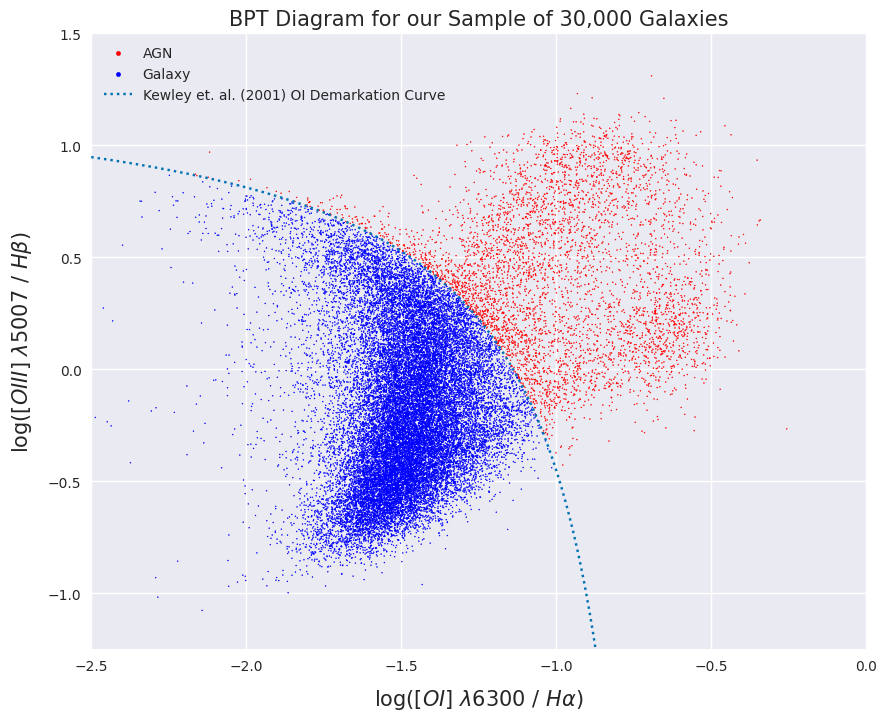

In [13]:
oi_colours = [color_dict[classification] for classification in gal_df['Oi_Classification']]

plt.figure(figsize=(10,8))

plt.scatter(gal_df['log_oi/ha'], gal_df['log_oiii/hb'], c=oi_colours, s=0.5)

# These points are only for plt.legend purposes. IDK a more elegant way to do this. 
plt.scatter([-10], [-10], c='red', s=10, label='AGN')
plt.scatter([-10], [-10], c='blue', s=10, label='Galaxy')

xmin, xmax = -2.5, 0
ymin, ymax = -1.25, 1.5
x = np.linspace(xmin, xmax, 1000)

# Getting Kewley OI values based on input log_oii/ha values using our functions.
kewley2001_oi_y = [kewley2001_oi_curve(log_oi_ha) for log_oi_ha in x]

plt.plot(x, kewley2001_oi_y, ':', label='Kewley et. al. (2001) OI Demarkation Curve')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel(r'$\log([OI]~\lambda 6300~/~H \alpha)$', size=15, labelpad=10)
plt.ylabel(r'$\log([OIII]~\lambda 5007~/~H \beta)$', size=15, labelpad=10)

plt.title('BPT Diagram for our Sample of 30,000 Galaxies', size=15)

plt.legend()
plt.show()

In [14]:
print('The OI classification has',
      round(gal_df['Oi_Classification'].value_counts()['AGN'] / gal_df['Classification'].value_counts()['AGN'], 3),
      'times the AGN classifications as the NII classification.')
print('The OI classification has',
      round(gal_df['Oi_Classification'].value_counts()['Galaxy'] / gal_df['Classification'].value_counts()['Galaxy'], 3),
      'times the SF Galaxy classifications as the NII classification.')

The OI classification has 1.518 times the AGN classifications as the NII classification.
The OI classification has 1.096 times the SF Galaxy classifications as the NII classification.


### Task (d)
Make a WHAN diagram, the equivalent width of $H\alpha$ $(WH\alpha)$ vs. $[N II] / H\alpha$ ratio, for the objects already classified (keep the same notation, i.e., the classification information obtained in the BPT diagram). Comment and discuss the obtained results, give the number/percentage of objects classified as (strong) AGN/Seyferts by the BPT and WHAN diagrams.

In [15]:
gal_df['h_alpha_eqw'] = np.abs(gal_df['h_alpha_eqw'].to_numpy())
gal_df['nii_6584_eqw'] = np.abs(gal_df['nii_6584_eqw'].to_numpy())

# Make the WHAN classifier
def whan_classifier(h_alpha_eqw, nii_6584_eqw, log_nii_ha):
    if (h_alpha_eqw < 0.5) and (nii_6584_eqw < 0.5):
        return 'Passive'
    if h_alpha_eqw < 3:
        return 'Retired'
    if (log_nii_ha > -0.4) and ((h_alpha_eqw > 3) and (h_alpha_eqw < 6)):
        return 'wAGN'
    if (log_nii_ha > -0.4) and (h_alpha_eqw > 6):
        return 'sAGN'
    if (log_nii_ha < -0.4) and (h_alpha_eqw > 3):
        return 'SFR'
    return 'Uncertain'

gal_df['WHAN_Classification'] = gal_df.apply(lambda row: whan_classifier(row['h_alpha_eqw'], row['nii_6584_eqw'], row['log_nii/ha']), axis=1)
gal_df.head()

,specobjid,z,oi_6300_flux,oiii_5007_flux,nii_6584_flux,nii_6584_eqw,sii_6717_flux,sii_6731_flux,h_alpha_flux,h_alpha_eqw,h_beta_flux,log_oiii/hb,log_nii/ha,Classification,z_bin,log_sii/ha,Sii_Classification,log_oi/ha,Oi_Classification,WHAN_Classification
0,299499298171676672,0.048086,19.59912,55.35548,367.87630,10.877340,80.13560,70.84364,510.6647,15.40855,91.71097,-0.219261,-0.142434,Composite,1,-0.804310,Galaxy,-1.415899,Galaxy,sAGN
1,299518814503069696,0.123199,24.92998,34.62197,256.07290,10.849480,101.18960,75.75684,555.7532,23.83372,111.30090,-0.507147,-0.336518,Galaxy,3,-0.739746,Galaxy,-1.348160,Galaxy,sAGN
2,299519089380976640,0.035808,33.85272,210.51950,359.10240,12.522310,256.09650,182.80830,1311.7880,46.32598,333.19610,-0.199408,-0.562645,Galaxy,1,-0.709460,Galaxy,-1.588270,Galaxy,SFR
3,299532558398416896,0.021758,59.05846,780.11430,465.84510,11.588670,430.35350,299.65790,2292.5280,56.84101,638.05270,0.087302,-0.692073,Galaxy,1,-0.726489,Galaxy,-1.589033,Galaxy,SFR
4,299569117160040448,0.118615,12.11208,28.04560,68.26641,5.094373,33.76559,26.44269,133.9965,10.12710,32.09054,-0.058512,-0.292886,Composite,3,-0.598619,Galaxy,-1.043875,AGN,sAGN


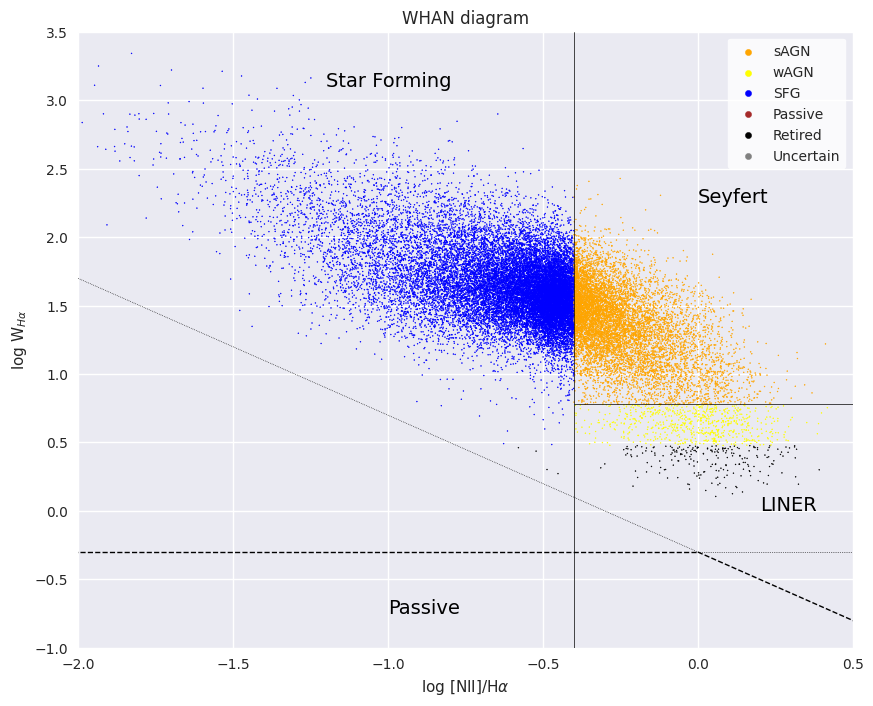

In [16]:
# Plotting the WHAN diagram
whan_color_dict = {'sAGN': 'orange', 'wAGN': 'yellow', 'SFR': 'blue', 'Passive': 'brown', 'Retired': 'black', 'Uncertain': 'gray'}
whan_colours = [whan_color_dict[classification] for classification in gal_df['WHAN_Classification']]

plt.figure(figsize=(10,8))

plt.scatter(gal_df['log_nii/ha'], np.log10(gal_df['h_alpha_eqw']), c=whan_colours, s=0.5)

# These points are only for plt.legend purposes. IDK a more elegant way to do this. 
plt.scatter([-10], [-10], c='orange', s=20, label='sAGN')
plt.scatter([-10], [-10], c='yellow', s=20, label='wAGN')
plt.scatter([-10], [-10], c='blue', s=20, label='SFG')
plt.scatter([-10], [-10], c='brown', s=20, label='Passive')
plt.scatter([-10], [-10], c='black', s=20, label='Retired')
plt.scatter([-10], [-10], c='gray', s=20, label='Uncertain')

plt.axvline(x=-0.4, color='black', linewidth=0.5)
plt.hlines(y=np.log10(6), xmin=-0.4, xmax=0.5, color='black', linewidth=0.5)
plt.hlines(y=np.log10(0.5), xmin=-2.5, xmax=0, color='black', linewidth=1, linestyle='--')
plt.hlines(y=np.log10(0.5), xmin=0, xmax=0.5, color='black', linewidth=0.5, linestyle=':')

# the sloped line
m = (np.log10(5)-np.log10(0.5)) / (-1 - 0)
x1 = np.linspace(-2.5, 0, 100)
x2 = np.linspace(0, 0.6, 100)

y1 = m * x1 + np.log10(0.5)
y2 = m * x2 + np.log10(0.5)

plt.plot(x1, y1, linestyle=':', linewidth=0.5, c='k')
plt.plot(x2, y2, linestyle='--', linewidth=1, c='k')

plt.xlim(-2, 0.5)
plt.ylim(-1, 3.5)

plt.annotate('Seyfert', xy=(0,2.25), color='black', size=14)
plt.annotate('LINER', xy=(0.2,0), color='black', size=14)
plt.annotate('Star Forming', xy=(-1.2, 3.1), color='black', size=14)
plt.annotate('Passive', xy=(-1, -0.75), color='black', size=14)

plt.xlabel(r"log [NII]/H$\alpha$")
plt.ylabel(r"log W$_{H\alpha}$")

plt.title("WHAN diagram")
legend=plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_color('white')
plt.show()

Let's compare the percentages of galaxies classified by BPT vs. WHAN

In [17]:
bpt_agn_percent = 100 * (gal_df['Classification'].value_counts()['AGN'] / gal_df['Classification'].value_counts().sum())
whan_sagn_percent = 100 * (gal_df['WHAN_Classification'].value_counts()['sAGN'] / gal_df['WHAN_Classification'].value_counts().sum())

print('BPT classifies {0:.3g}% of galaxies as AGN while WHAN classifies {1:.3g}% of galaxies as sAGN.'.format(bpt_agn_percent, whan_sagn_percent))

BPT classifies 9.86% of galaxies as AGN while WHAN classifies 28.2% of galaxies as sAGN.


## Task 3
For sample of AGN selected from the SDSS database, find the WISE counterparts with a matching tolerance of $3''$ ($\sim 0.5 \times$ FWHM of the WISE PSF at $3.4~\mu$m), and get the three WISE colors (W1, W2, W3). Locate the object on the WISE colour-colour plot using the selection criteria defined by Mateos et al. (2012, 2013):

$y = 0.315 \times x$

$x ≡ \log_{10}(f12um / f4.6um)$

$y ≡ \log_{10}(f4.6um / f3.4um)$

The top and bottom boundaries of the wedge are obtained by adding y-axis intercepts of $+0.297$ and $−0.110$, respectively. The MIR power-law $\alpha = −0.3$ bottom-left limit corresponds to:

$y = −3.172 \times x + 0.436$

Plot your results on top of the Figure 12 taken from Wright et al. (2010).

Comment on what is the percentage of object found in both SDSS and WISE survey, what is the number/percentage of objects defined as AGN by SDSS and WISE, as well as what is the number/percentage of objects found to be AGN by both surveys

In [18]:
SDSS.clear_cache()
wise_query = '''SELECT s.specObjID, g.subclass, g.e_bv_sfd, w.w1mpro, w.w2mpro, w.w3mpro, w.w1flux, w.w2flux, w.w3flux

FROM SpecObjAll AS s
    JOIN GalSpecInfo AS g ON s.specobjid = g.specobjid 
    JOIN GalSpecLine AS l ON s.specobjid = l.specobjid	
    JOIN wise_xmatch AS x ON s.bestobjid = x.sdss_objid
    JOIN wise_allsky AS w ON x.wise_cntr = w.cntr
    
WHERE
    (s.class = "QSO" OR s.class = "GALAXY")
AND s.z < 0.35
AND l.sigma_forbidden < (500 / 2.335)
AND x.match_dist <= 3
AND w.w1snr > 5
AND w.w2snr > 5
AND w.w3snr > 5
AND w.w1flux / w.w1sigflux > 5
AND w.w2flux / w.w2sigflux > 5
AND w.w3flux / w.w3sigflux > 5'''

# We'll load up the CSV we get from running the query above.
wise_df = pd.read_csv('wise_query.csv', skiprows=[0])
wise_df.head()

,specObjID,subclass,e_bv_sfd,w1mpro,w2mpro,w3mpro,w1flux,w2flux,w3flux
0,967220076862269440,STARFORMING,0.029516,15.030,14.743,11.179,154.11,79.973,535.10
1,967221451251804160,STARFORMING,0.030356,13.963,13.813,10.355,411.83,188.350,1143.40
2,967239868071569408,STARFORMING,0.039771,14.805,14.805,11.105,189.68,75.503,572.76
3,967261033670404096,STARFORMING,0.042938,13.130,12.985,9.735,887.56,403.790,2022.30
4,967262408059938816,STARBURST,0.042916,14.173,13.863,9.949,339.60,179.790,1660.40


In [19]:
gal_comb = pd.merge(wise_df, gal_df, left_on='specObjID', right_on='specobjid')
gal_comb.head()

,specObjID,subclass,e_bv_sfd,w1mpro,w2mpro,w3mpro,w1flux,w2flux,w3flux,specobjid,...,h_beta_flux,log_oiii/hb,log_nii/ha,Classification,z_bin,log_sii/ha,Sii_Classification,log_oi/ha,Oi_Classification,WHAN_Classification
0,967285222926215168,STARFORMING,0.042175,14.431,14.178,10.437,267.71,134.550,1059.30,967285222926215168,...,79.29813,-0.383599,-0.424344,Galaxy,3,-0.787721,Galaxy,-1.463249,Galaxy,SFR
1,968296773657323520,STARFORMING,0.067271,12.708,12.534,8.458,1308.20,611.300,6558.20,968296773657323520,...,180.41780,-0.735900,-0.466524,Galaxy,1,-0.911818,Galaxy,-1.647787,Galaxy,SFR
2,969461156454361088,STARBURST,0.041710,14.897,14.548,10.887,174.27,95.698,700.23,969461156454361088,...,139.96530,-0.100363,-0.541313,Galaxy,2,-0.729643,Galaxy,-1.402798,Galaxy,SFR
3,969506236431099904,STARFORMING,0.042216,14.396,14.128,10.677,276.38,140.850,849.54,969506236431099904,...,67.27159,-0.310808,-0.298067,Composite,3,-0.673493,Galaxy,-1.391686,Galaxy,sAGN
4,969560387378767872,STARBURST,0.041369,15.426,15.036,11.277,107.03,61.022,488.81,969560387378767872,...,116.23620,-0.350245,-0.306244,Composite,4,-0.864144,Galaxy,-1.700819,Galaxy,sAGN


In [20]:
R_w1w2 = 0.056
R_w2w3 = -0.045

gal_comb['w1-w2'] = gal_comb['w1mpro'] - gal_comb['w2mpro'] - (R_w1w2 * gal_comb['e_bv_sfd'])
gal_comb['w2-w3'] = gal_comb['w2mpro'] - gal_comb['w3mpro'] - (R_w2w3 * gal_comb['e_bv_sfd'])

gal_comb['w3/w2'] = np.log10(gal_comb['w3flux'] / gal_comb['w2flux'])
gal_comb['w2/w1'] = np.log10(gal_comb['w2flux'] / gal_comb['w1flux'])

In [21]:
def wise_classifier(w1minusw2, w2minusw3):
    if w1minusw2 >= 0.8:
        return 'AGN'
    if w2minusw3 <= 2:
        return 'Spheroids'
    if w2minusw3 <= 3.5 and w2minusw3 > 2:
        return 'Intermediate Disks'
    if w2minusw3 > 3.5:
        return 'SF Disks'

gal_comb['WISE_Classification'] = gal_comb.apply(lambda row: wise_classifier(row['w1-w2'], row['w2-w3']), axis=1)
gal_comb.head()

,specObjID,subclass,e_bv_sfd,w1mpro,w2mpro,w3mpro,w1flux,w2flux,w3flux,specobjid,...,log_sii/ha,Sii_Classification,log_oi/ha,Oi_Classification,WHAN_Classification,w1-w2,w2-w3,w3/w2,w2/w1,WISE_Classification
0,967285222926215168,STARFORMING,0.042175,14.431,14.178,10.437,267.71,134.550,1059.30,967285222926215168,...,-0.787721,Galaxy,-1.463249,Galaxy,SFR,0.250638,3.742898,0.896135,-0.298781,SF Disks
1,968296773657323520,STARFORMING,0.067271,12.708,12.534,8.458,1308.20,611.300,6558.20,968296773657323520,...,-0.911818,Galaxy,-1.647787,Galaxy,SFR,0.170233,4.079027,1.030530,-0.330420,SF Disks
2,969461156454361088,STARBURST,0.041710,14.897,14.548,10.887,174.27,95.698,700.23,969461156454361088,...,-0.729643,Galaxy,-1.402798,Galaxy,SFR,0.346664,3.662877,0.864338,-0.260320,SF Disks
3,969506236431099904,STARFORMING,0.042216,14.396,14.128,10.677,276.38,140.850,849.54,969506236431099904,...,-0.673493,Galaxy,-1.391686,Galaxy,sAGN,0.265636,3.452900,0.780427,-0.292750,Intermediate Disks
4,969560387378767872,STARBURST,0.041369,15.426,15.036,11.277,107.03,61.022,488.81,969560387378767872,...,-0.864144,Galaxy,-1.700819,Galaxy,sAGN,0.387683,3.760862,0.903654,-0.244019,SF Disks


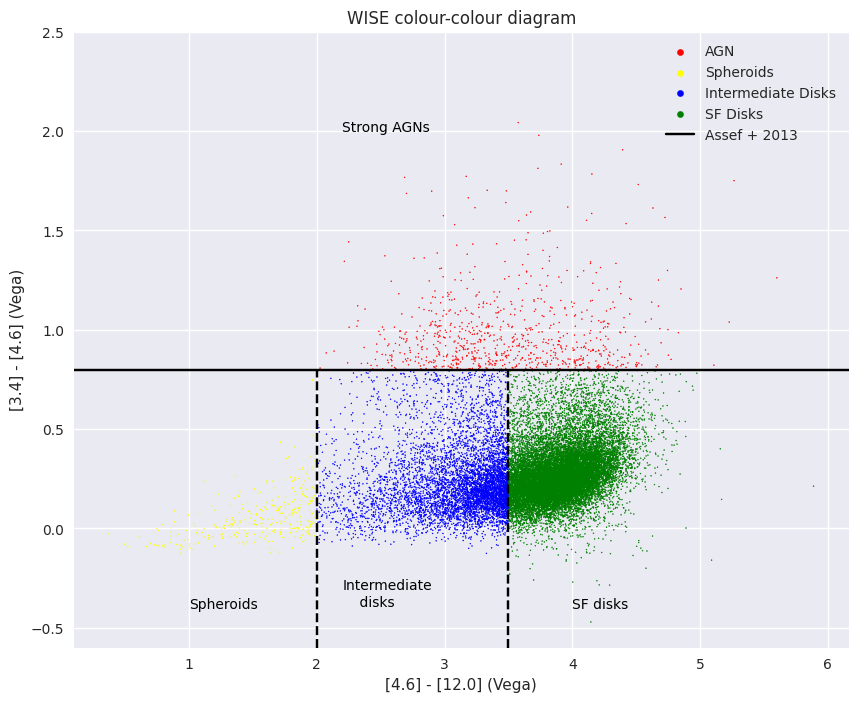

In [22]:
# Plotting the WHAN diagram
wise_colour_dict = {'AGN': 'red', 'Spheroids': 'yellow', 'Intermediate Disks': 'blue', 'SF Disks': 'green'}
wise_colours = [wise_colour_dict[classification] for classification in gal_comb['WISE_Classification']]

plt.figure(figsize=(10,8))

plt.scatter(gal_comb['w2-w3'], gal_comb['w1-w2'], c=wise_colours, s=0.5)

# These points are only for plt.legend purposes. IDK a more elegant way to do this. 
plt.scatter([], [], c='red', s=20, label='AGN')
plt.scatter([], [], c='yellow', s=20, label='Spheroids')
plt.scatter([], [], c='blue', s=20, label='Intermediate Disks')
plt.scatter([], [], c='green', s=20, label='SF Disks')

plt.axhline(y=0.8, c='k', label="Assef + 2013")
plt.vlines(x=2, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.vlines(x=3.5, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.annotate('Strong AGNs', xy=(2.2,2), color='black')
plt.annotate('Spheroids', xy=(1,-0.4), color='black')
plt.annotate('Intermediate\n    disks', xy=(2.2,-0.39), color='black')
plt.annotate('SF disks', xy=(4,-0.4), color='black')

plt.ylim(-0.6, 2.5)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram")

plt.legend()

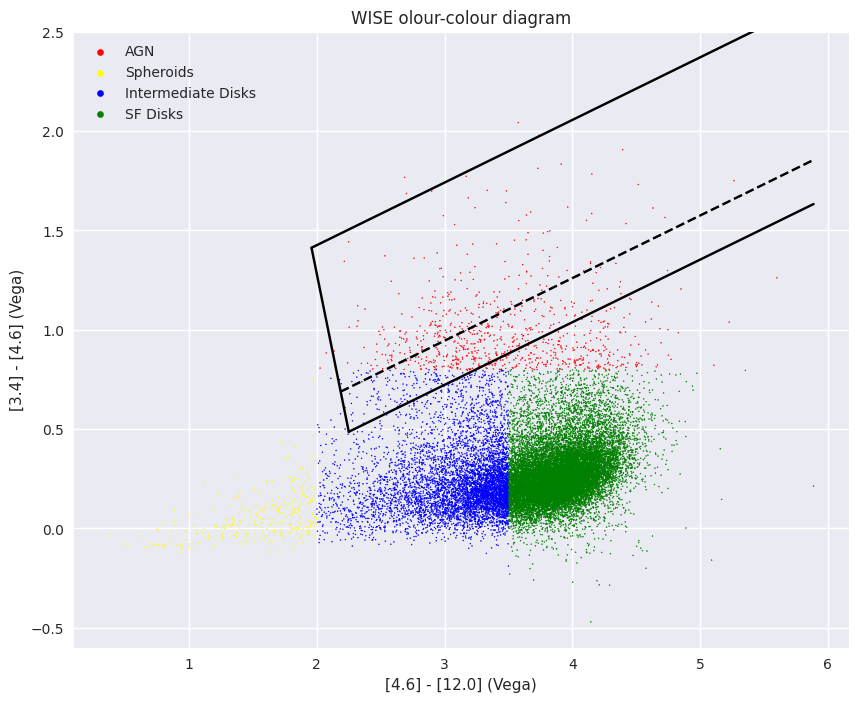

In [23]:
plt.figure(figsize=(10,8))

plt.scatter(gal_comb['w2-w3'], gal_comb['w1-w2'], c=wise_colours, s=0.5)

# These points are only for plt.legend purposes. IDK a more elegant way to do this. 
plt.scatter([], [], c='red', s=20, label='AGN')
plt.scatter([], [], c='yellow', s=20, label='Spheroids')
plt.scatter([], [], c='blue', s=20, label='Intermediate Disks')
plt.scatter([], [], c='green', s=20, label='SF Disks')

def y_cen(x): return [0.315*i for i in x]
def y_top(x): return [0.315*i+0.796 for i in x]
def y_bot(x): return [0.315*i-0.222 for i in x]
def y_lim(x): return [-3.172*i+7.624 for i in x]

x_cen = (7.624)/(0.315+3.172)
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
def x_range(x_pos): return np.linspace(x_pos, np.max(gal_comb['w2-w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

plt.plot(x_range(x_cen), y_cen(x_range(x_cen)), 'k--')
plt.plot(x_range(x_top), y_top(x_range(x_top)), 'k-')
plt.plot(x_range(x_bot), y_bot(x_range(x_bot)), 'k-')
plt.plot(x_lim, y_lim(x_lim), 'k-')

plt.ylim(-0.6, 2.5)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE olour-colour diagram")

plt.legend()

/tmp/ipykernel_218702/3547495746.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


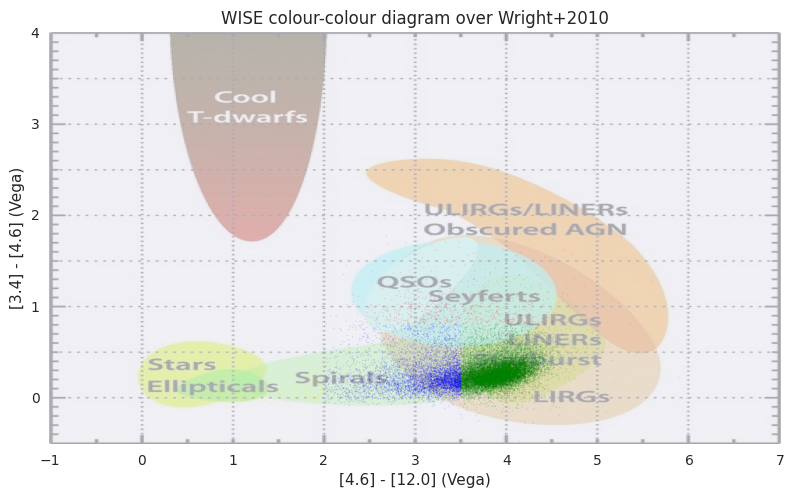

In [24]:
fig = plt.figure(figsize=(566*2/120, 622*2/120))

img = plt.imread('figure12.jpg')
plt.imshow(img, zorder=0, extent=[-1.009, 7, -0.510, 4], alpha=0.3, aspect='equal')
plt.scatter(gal_comb['w2-w3'], gal_comb['w1-w2'], c=wise_colours, s=0.5, alpha=0.1)
# plt.xlim(-1,7)
# plt.xticks(np.arange(0, 7, 2))
# plt.yticks(np.arange(0, 5, 1))
# plt.ylim(-0.5,4)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram over Wright+2010")

plt.grid(False)

plt.legend()

In [25]:
bpt_galaxy_percentage, bpt_composite_percentage, bpt_agn_percentage =  (gal_df['Classification'].value_counts() / gal_df['Classification'].size).to_numpy()

print('Our original query of 30,000 objects was classified to have {0:.3g}% SFGs, {1:.3g}% Composites, and {2:.3g}% AGNs'.format(100 * bpt_galaxy_percentage,
                                                                                                                  100 * bpt_composite_percentage,
                                                                                                                  100 * bpt_agn_percentage))

Our original query of 30,000 objects was classified to have 77.5% SFGs, 12.6% Composites, and 9.86% AGNs


In [26]:
print('Out of the 30,000 original galaxies, {0:.3g}% ({1} galaxies) were found in WISE.'.format(100 * len(gal_comb) / len(gal_df), len(gal_comb)))

Out of the 30,000 original galaxies, 84.3% (25297 galaxies) were found in WISE.


In [27]:
gal_comb['WISE_Classification'].value_counts()

WISE_Classification
SF Disks              18024
Intermediate Disks     6155
AGN                     804
Spheroids               314
Name: count, dtype: int64

In [28]:
wise_sfgs, wise_intermediates, wise_agns, wise_spheroids =  (gal_comb['WISE_Classification'].value_counts() / gal_comb['WISE_Classification'].size).to_numpy()

print('Our WISE+SDSS galaxies were classified by WISE CC to have {0:.3g}% SF Disks, {1:.3g}% Intermediate Disks, {2:.3g}% AGNs, and {3:.3g}% Spheroids'.format(100 * wise_sfgs,
                                                                                                                                                               100 * wise_intermediates,
                                                                                                                                                               100 * wise_agns,
                                                                                                                                                               100 * wise_spheroids))

Our WISE+SDSS galaxies were classified by WISE CC to have 71.2% SF Disks, 24.3% Intermediate Disks, 3.18% AGNs, and 1.24% Spheroids


## Task 4
From a catalogue of SDSS Stripe82 variable sources select a sample (at least 10) of quasar (type 1 AGN) light curve and test the QNPy package, for quasar light curves modeling using Conditional Neural Processes (follow tutorial without clustering, tip: check the demo workshop from SER-SAG-S1). For each light curve provides a basic info-sheet with: number of points, number of gaps (think of a metric to identify gaps), mean and median sampling, maximal/minimal/mean/median magnitude, variability amplitude. Comment on how well the QNPy models the light curve based on the above listed light curve parameters.

In [29]:
### load up the Stripe 81 catalog file

stripe81_df = pd.read_table('stripe82candidateVar_v1.1.dat', skiprows=range(6), delim_whitespace=True)
stripe81_df.head()

/tmp/ipykernel_218702/4092506300.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  stripe81_df = pd.read_table('stripe82candidateVar_v1.1.dat', skiprows=range(6), delim_whitespace=True)


,ID,ra,dec,P,r,ug,gr,ri,iz,gN,gAmpl,rN,rAmpl,iN,iAmpl,zQSO,MiQSO
0,7904669,2.501237,-0.150518,2976.182949,18.92,0.11,0.12,0.08,-0.06,59,0.418,63,0.280,61,0.249,1.43,-25.802
1,7904764,359.999343,0.725718,2.574647,17.26,2.55,1.28,0.73,0.38,29,1.514,29,1.104,29,1.086,-9.90,-9.900
2,7904816,5.000314,0.034150,3321.033888,19.00,0.01,0.22,-0.05,-0.17,53,0.309,53,0.273,55,0.311,1.13,-24.795
3,7905184,297.499230,-0.394416,0.444523,14.62,1.90,0.64,0.24,0.11,15,2.046,12,1.046,8,0.045,-9.90,-9.900
4,7905505,297.498899,-0.247960,1.647168,19.12,0.80,0.38,0.10,-0.05,11,0.116,10,0.112,8,0.157,-9.90,-9.900


In [30]:
### If zQSO or MiQSO = -9.9, then the object is not a spectroscopically confirmed SDSS Quasar, so we ignore them

stripe81_df = stripe81_df[(stripe81_df['zQSO'] != -9.9) & (stripe81_df['MiQSO'] != -9.9)]
stripe81_df.head()

,ID,ra,dec,P,r,ug,gr,ri,iz,gN,gAmpl,rN,rAmpl,iN,iAmpl,zQSO,MiQSO
0,7904669,2.501237,-0.150518,2976.182949,18.92,0.11,0.12,0.08,-0.06,59,0.418,63,0.280,61,0.249,1.43,-25.802
2,7904816,5.000314,0.034150,3321.033888,19.00,0.01,0.22,-0.05,-0.17,53,0.309,53,0.273,55,0.311,1.13,-24.795
11,7906590,25.001009,-1.200046,1852.294833,18.71,0.29,0.04,-0.14,0.08,54,0.295,58,0.311,58,0.319,0.78,-24.195
13,7907016,347.500691,0.535576,2934.938708,19.47,0.22,0.25,0.23,-0.05,53,0.624,56,0.503,57,0.453,1.50,-25.760
19,7907462,44.998688,0.803794,3320.187492,19.13,0.28,0.08,-0.11,0.13,67,0.315,67,0.316,66,0.328,0.89,-24.160


In [31]:
# We want the LCs with the highest numbers of data points
stripe81_df = stripe81_df.sort_values(by='gN', ascending=False)
stripe81_df.head()

,ID,ra,dec,P,r,ug,gr,ri,iz,gN,gAmpl,rN,rAmpl,iN,iAmpl,zQSO,MiQSO
21461,3032591,48.768774,0.210403,2507.727904,18.20,0.13,0.05,0.23,0.00,140,0.262,139,0.192,141,0.153,1.78,-27.219
16563,2473812,44.186198,0.212799,3297.662702,17.70,0.43,0.06,-0.01,0.17,138,0.397,136,0.367,138,0.331,2.25,-28.071
29114,3844725,50.688407,-0.417868,3106.820835,19.55,0.31,0.50,0.18,0.10,138,0.675,139,0.610,135,0.576,1.25,-24.673
21735,3078106,48.139437,-0.418183,2906.380488,19.77,0.30,0.37,0.28,0.11,137,0.524,141,0.493,138,0.443,1.49,-25.243
17210,2579983,44.890520,-0.421581,3303.586613,18.59,-0.05,-0.04,0.27,-0.03,137,0.573,134,0.528,138,0.404,1.76,-26.882


In [33]:
### We will choose the first 10 light curves here.
lc_ids = stripe81_df.head(10)['ID'].to_numpy()
lc_ids

array([3032591, 2473812, 3844725, 3078106, 2579983, 3104329, 3152786,
       2524327, 3102202, 3097526])

In [34]:
# We've saved the .dat files for our required IDs, and now will clean them and turn them into CSVs
# Also going to ignore all warnings

import warnings
warnings.filterwarnings("ignore")

for id in lc_ids:
    df = pd.read_table('stripe81_lcs/LC_{}.dat'.format(id), delim_whitespace=True, names=['mjd', 'band', 'mag', 'magerr'])
    df = df[df['band'] == 'g']
    df = df.drop('band', axis=1)
    df = df[df.mjd.apply(lambda x: not x.startswith('#'))]
    df.to_csv('./light_curves/{}.csv'.format(id), index=False)

In [35]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the funcion transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [36]:
#Importing the data. This can be done in any desired manner, but the data must contain:
#mjd - MJD or time, mag-magnitude and magerr-magnitude error. 
# In this example we used pandas python package for importing the .csv data, but numpy can be used if the data is 
#in .txt file
path = './light_curves' #path to data
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data = pd.concat(df_list, ignore_index=True)

Text(0, 0.5, 'Magnitude')

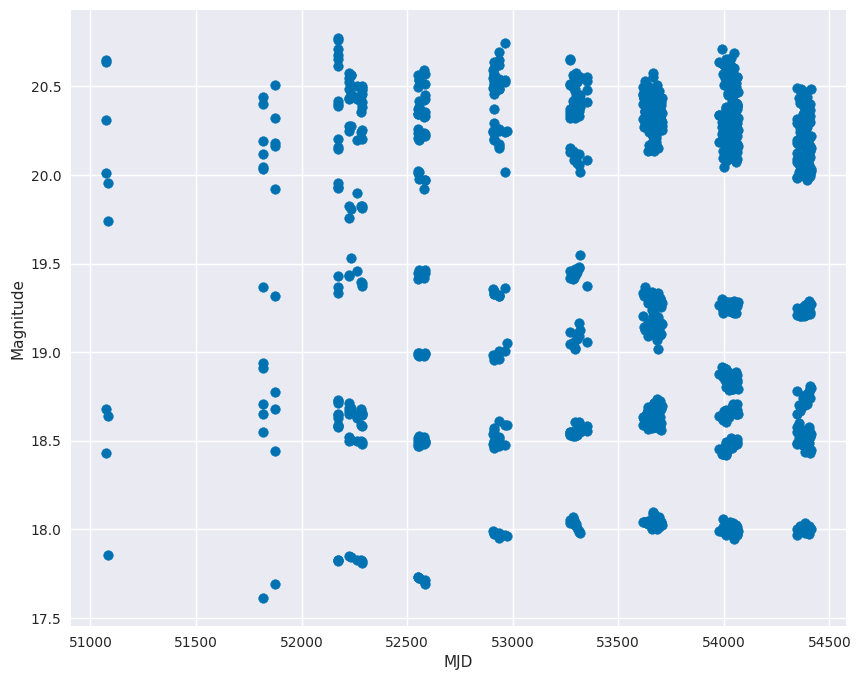

In [37]:
plt.figure(figsize=(10,8))

plt.scatter(data['mjd'], data['mag'])
plt.xlabel('MJD')
plt.ylabel('Magnitude')

In [38]:
#Cleaning the outliers second approach
#This function not only cleans data by removing outliers but also aggregates time and fluxes, 
#computing a weighted average of magnitudes for closely spaced time points, 
#and then saves the cleaned and aggregated files.

input_folder = './light_curves'
output_folder = './light_curves_clean'
threshold_aggregation = 5
threshold_outliers = 3.0

outliers=pr.clean_save_aggregate_data(input_folder, output_folder, threshold_aggregation, threshold_outliers)

Cleaned and saved 3152786.csv to ./light_curves_clean/3152786.csv
Cleaned and saved 3097526.csv to ./light_curves_clean/3097526.csv
Cleaned and saved 3078106.csv to ./light_curves_clean/3078106.csv
Cleaned and saved 2524327.csv to ./light_curves_clean/2524327.csv
Cleaned and saved 3032591.csv to ./light_curves_clean/3032591.csv
Cleaned and saved 2579983.csv to ./light_curves_clean/2579983.csv
Cleaned and saved 3844725.csv to ./light_curves_clean/3844725.csv
Cleaned and saved 3102202.csv to ./light_curves_clean/3102202.csv
Cleaned and saved 3104329.csv to ./light_curves_clean/3104329.csv
Cleaned and saved 2473812.csv to ./light_curves_clean/2473812.csv
Processing completed.


Text(0, 0.5, 'Magnitude')

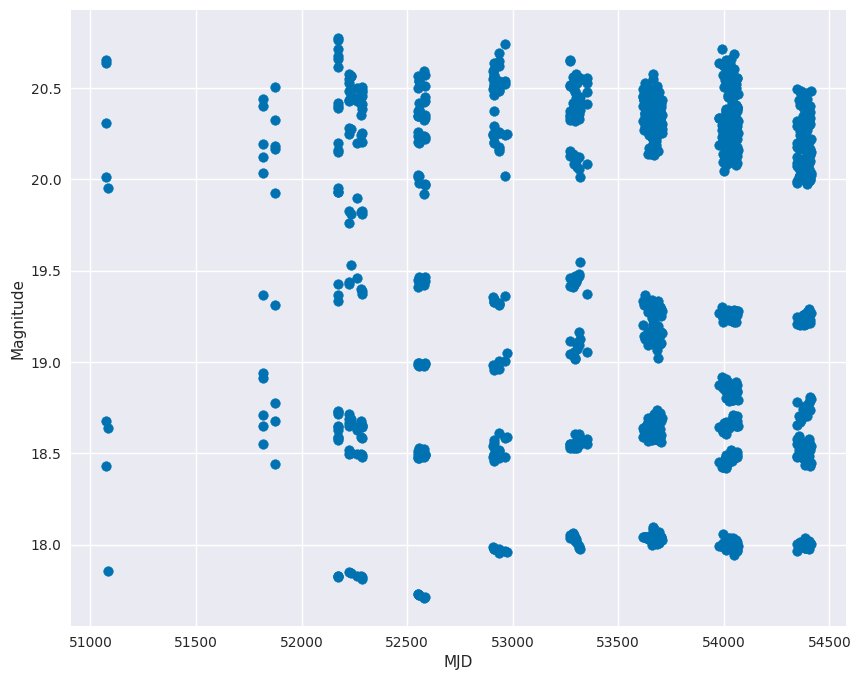

In [39]:
csv_files = glob.glob('./light_curves_clean/' + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data_clean_agg = pd.concat(df_list, ignore_index=True)

plt.figure(figsize=(10,8))

plt.scatter(data_clean_agg['mjd'], data_clean_agg['mag'])
plt.xlabel('MJD')
plt.ylabel('Magnitude')

In [40]:
# Padding the light curves
# We added the function for backward padding the curves with last observed value
# The length for padding should remain 100 or above 
# If you previously remowed the outliers from your light curves and saved the new one 
#in the folder light_curves_clean, here you use this folder insted of "./light_curves"

padding = pr.backward_pad_curves('./light_curves_clean/', './Padded_lc', desired_observations=100)

Created new file: ./Padded_lc/3152786.csv
Created new file: ./Padded_lc/3097526.csv
Created new file: ./Padded_lc/3078106.csv
Created new file: ./Padded_lc/2524327.csv
Created new file: ./Padded_lc/3032591.csv
Created new file: ./Padded_lc/2579983.csv
Created new file: ./Padded_lc/3844725.csv
Created new file: ./Padded_lc/3102202.csv
Created new file: ./Padded_lc/3104329.csv
Created new file: ./Padded_lc/2473812.csv


In [41]:
#Path to Padded Data
DATA_SRC = "./Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "./preproc" 

In [42]:
#listing the data that are going to be transformed. 
#In case that your original data is in one table, this is not needed
files = os.listdir(DATA_SRC) 

In [43]:
#running the transformation function
number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

In [44]:
import QNPy #Importing the package
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

In [45]:
DATA_SRC = "./preproc" #Path to transformed data

In [46]:
files = os.listdir(DATA_SRC) #listing the transformed data

In [47]:
#creating the folders for saving the splitted data
st.create_split_folders(train_folder='./dataset/train/', test_folder='./dataset/test/', val_folder='./dataset/val/')

In [48]:
#path to TRAIN, TEST and VAL folders where your splitted data will be saved. 
#You can directly enter this informations in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [49]:
#running the function for splitting the data
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER) 

100%|█████████████████████████████████████| 30/30 [00:00<00:00, 177.52it/s]


In [50]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model

In [51]:
BATCH_SIZE=32 #Defining the batch size, it should remain 32

In [52]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE) 

In [53]:
#defining the device for testing, it can be CPU of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
device

device(type='cpu')

In [54]:
#runing the function fo creating the model (deterministic model is default) 
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

In [55]:
#function for training the data
# numbers that we give in this example are: 
#1 - number of train_model function runs
#3000 - number of epochs
#2000 - number of early stopping limit
# These numbers are optional and can be changed as needed.
history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 1000, 500, mseMetric, maeMetric, device)

100%|██████████████████████████████████| 1000/1000 [01:41<00:00,  9.89it/s]


In [56]:
# Define the file names for saving the lists for all histories
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

In [57]:
#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [58]:
# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'  
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'  
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv'  

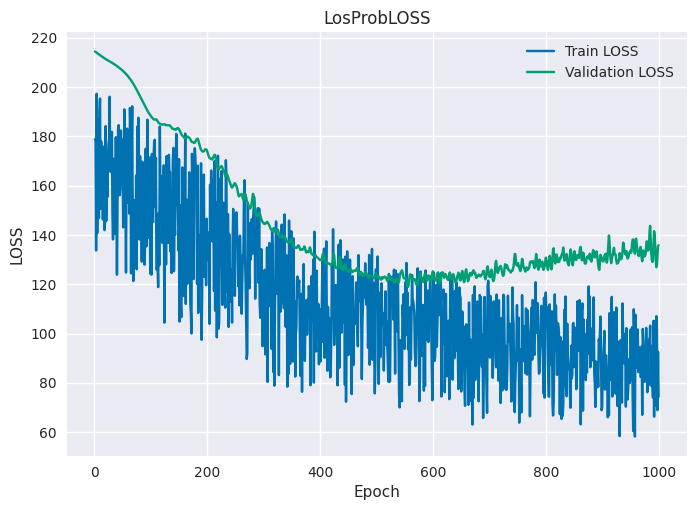

In [59]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

In [60]:
 # Replace with the path to your history_mse_train CSV file
history_mse_train_file = './history_mse_train.csv'
# Replace with the path to your history_mse_val CSV file
history_mse_val_file = './history_mse_val.csv'  
# Replace with the path to your epoch_counter_train_mse CSV file
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv'  

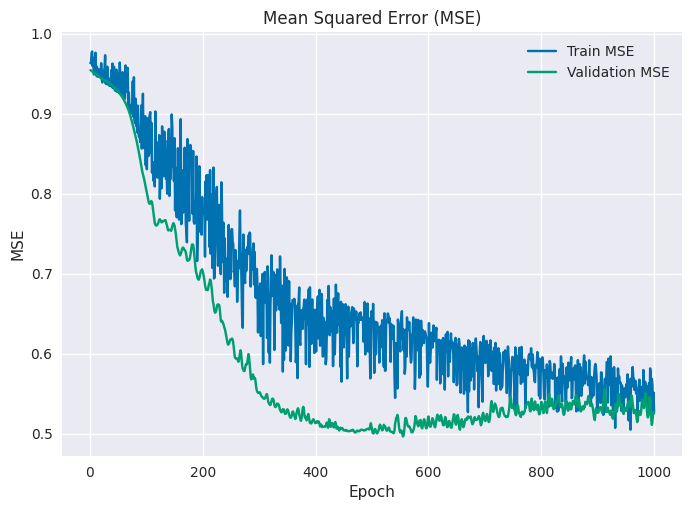

In [61]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

In [62]:
# Replace with the path to your history_mae_train CSV file
history_mae_train_file = './history_mae_train.csv'
# Replace with the path to your history_mae_val CSV file
history_mae_val_file = './history_mae_val.csv'  
# Replace with the path to your epoch_counter_train_mae CSV file
epoch_counter_train_mae_file = './epoch_counter_train_mae.csv'  

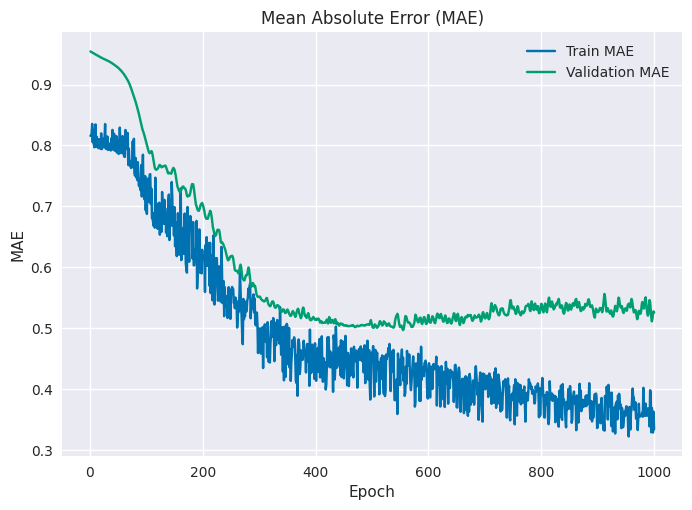

In [63]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

In [64]:
save=st.save_model(model, MODEL_PATH)#saving the trained model

In [65]:
import QNPy #Importing the package
#Importing PREDICTION_onePDF_original_mjd module from the package
from QNPy import PREDICTION_onePDF_original_mjd as pop
#Importing all packages from PREDICTION_onePDF_original_mjd module
from QNPy.PREDICTION_onePDF_original_mjd import * 
#The functions plot_function2, back_x, back_y and find_LC_transorm must be imported separately
from QNPy.PREDICTION_onePDF_original_mjd import plot_function2, back_x, back_y, find_LC_transform 

In [66]:
#defining the device, it can be cpu of cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [67]:
# Creating all needed folders
# If you already manually created prediction folders, this can be scipped
pop.create_prediction_folders()

Folder already exists: ./output/predictions/train
Folder already exists: ./output/predictions/train/plots
Folder already exists: ./output/predictions/train/data
Folder already exists: ./output/predictions/test
Folder already exists: ./output/predictions/test/plots
Folder already exists: ./output/predictions/test/data
Folder already exists: ./output/predictions/val
Folder already exists: ./output/predictions/val/plots
Folder already exists: ./output/predictions/val/data


In [68]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = "./output/predictions/" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [69]:
clearfolders=pop.clear_output_dir(OUTPUT_PATH)#clearing the output directorium, it can be sciped

In [70]:
model = prmodel = pop.load_model(MODEL_PATH, device)#loading trained modeld.load_trained_model(MODEL_PATH, device) #loading the model

In [71]:
criterion, mseMetric=pop.get_criteria()#loading criterion adn metrics

In [72]:
#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/test"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 3032591_original_split0.csv
Deleted file with 'minus' or 'plus' in the name: 3104329_plus_split22.csv
Removed padding in file: 3152786_original_split18.csv


In [73]:
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/train"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Deleted file with 'minus' or 'plus' in the name: 3097526_plus_split26.csv
Deleted file with 'minus' or 'plus' in the name: 2579983_plus_split27.csv
Removed padding in file: 2579983_original_split8.csv
Deleted file with 'minus' or 'plus' in the name: 3078106_minus_split4.csv
Deleted file with 'minus' or 'plus' in the name: 3102202_plus_split15.csv
Deleted file with 'minus' or 'plus' in the name: 3032591_plus_split23.csv
Removed padding in file: 2524327_original_split3.csv
Deleted file with 'minus' or 'plus' in the name: 2524327_minus_split5.csv
Removed padding in file: 3078106_original_split9.csv
Deleted file with 'minus' or 'plus' in the name: 3152786_plus_split1.csv
Deleted file with 'minus' or 'plus' in the name: 3032591_minus_split6.csv
Removed padding in file: 3104329_original_split11.csv
Deleted file with 'minus' or 'plus' in the name: 3102202_minus_split20.csv
Deleted file with 'minus' or 'plus' in the name: 3104329_minus_split24.csv
Deleted file with 'minus' or 'plus' in the nam

In [74]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/val"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Deleted file with 'minus' or 'plus' in the name: 2473812_plus_split10.csv
Deleted file with 'minus' or 'plus' in the name: 2473812_minus_split17.csv
Deleted file with 'minus' or 'plus' in the name: 3844725_plus_split19.csv
Removed padding in file: 3097526_original_split29.csv
Deleted file with 'minus' or 'plus' in the name: 2579983_minus_split28.csv
Deleted file with 'minus' or 'plus' in the name: 2524327_plus_split16.csv


In [75]:
tr=pop.load_trcoeff()#loading the transformation coeff

In [76]:
testSet, testLoader=pop.load_test_data(DATA_PATH_TEST)#loading test data

In [77]:
trainSet, trainLoader=pop.load_train_data(DATA_PATH_TRAIN)#loading train data

In [78]:
valSet, valLoader = pop.load_val_data(DATA_PATH_VAL)#loading validation data

 50%|████████████████████                    | 1/2 [00:00<00:00,  2.17it/s]

100%|████████████████████████████████████████| 2/2 [00:00<00:00,  2.81it/s]

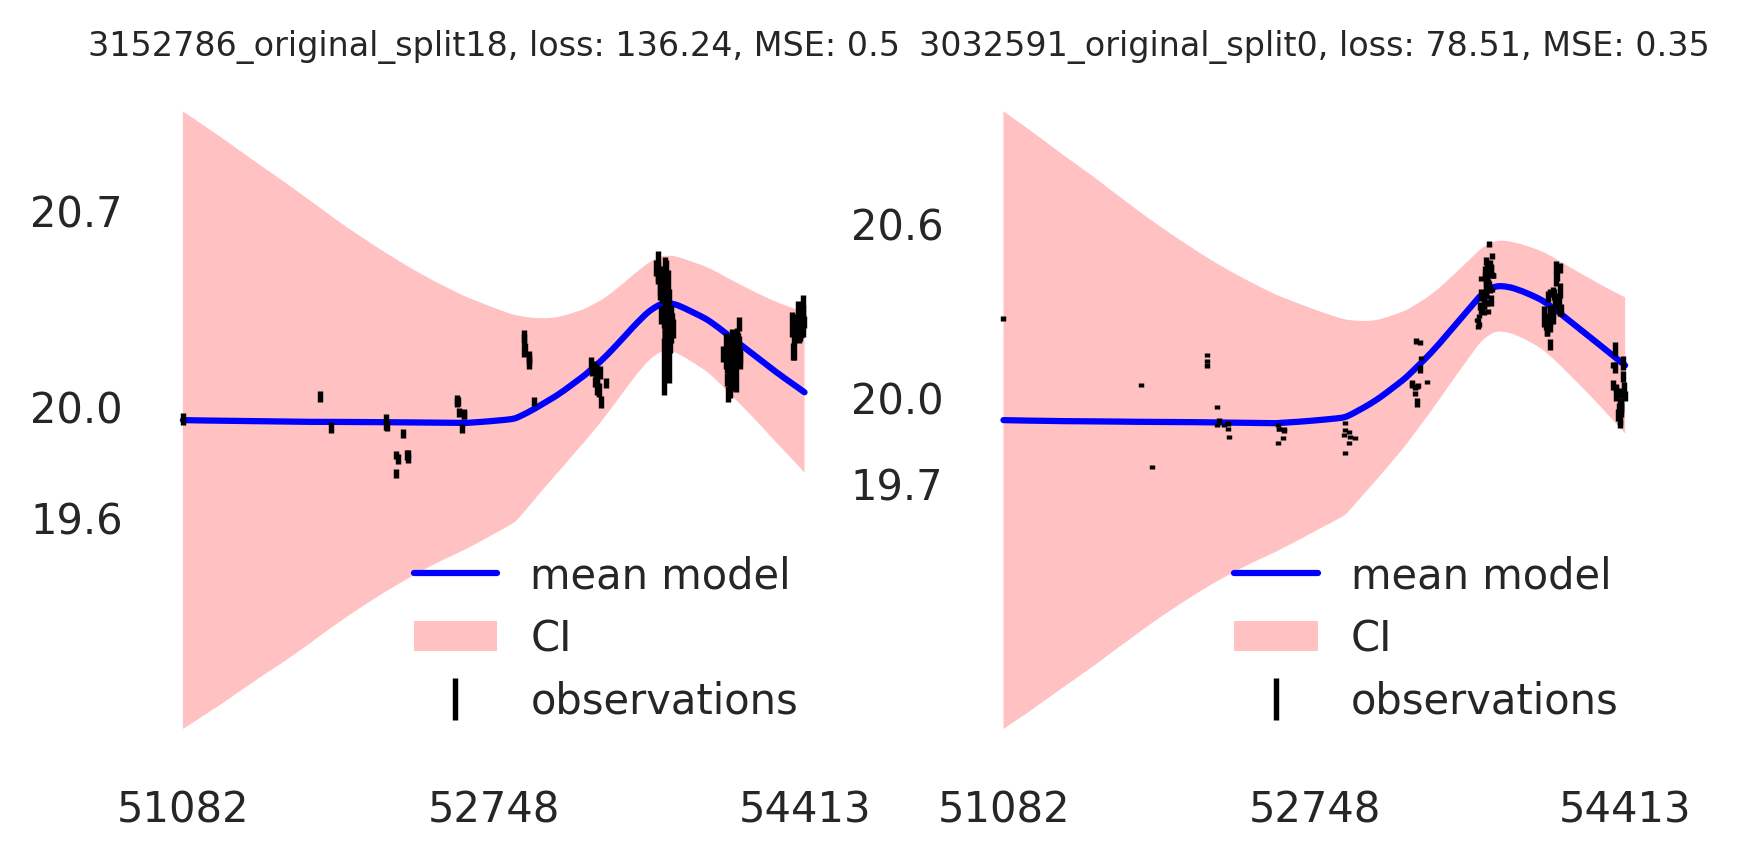

In [79]:
#prediction and plotting od test data
testMetrics=pop.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function2, device,tr)

In [80]:
savetest=pop.save_test_metrics(OUTPUT_PATH, testMetrics)#saving the test metrics

 57%|██████████████████████▊                 | 4/7 [00:00<00:00,  9.17it/s]

100%|████████████████████████████████████████| 7/7 [00:00<00:00, 10.14it/s]


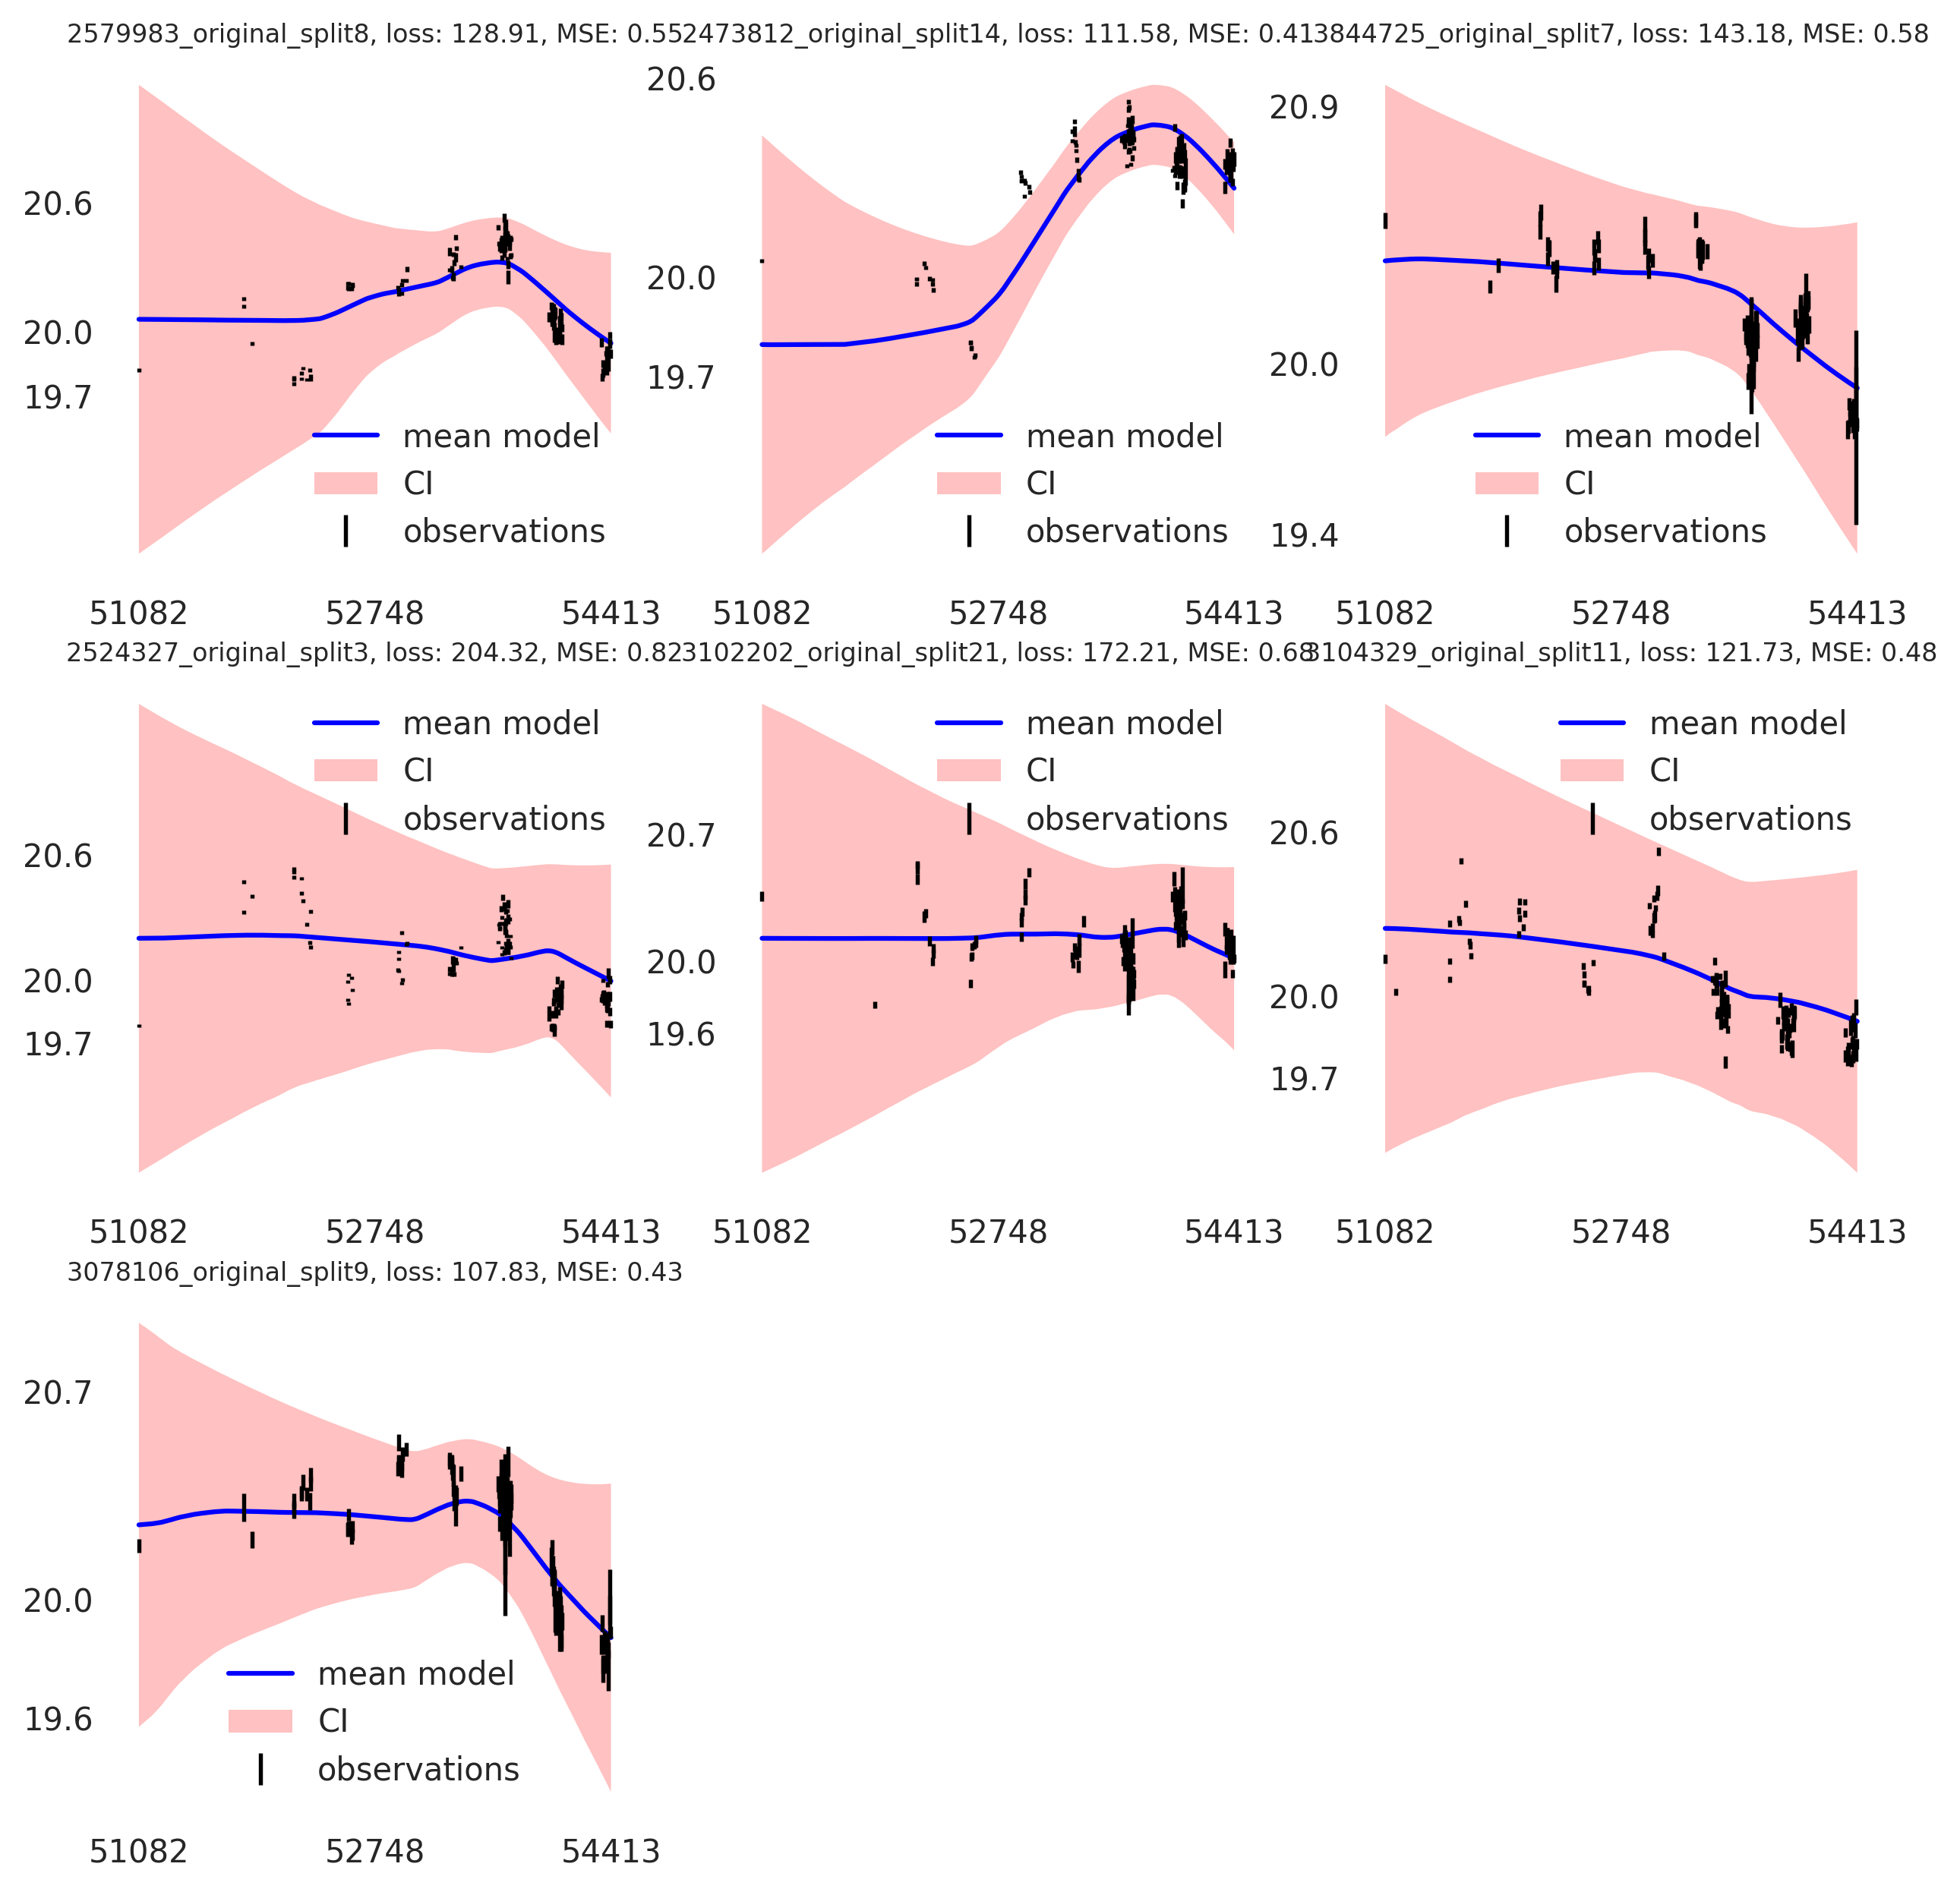

In [81]:
#prediction and plotting train data
trainMetrics=pop.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function2, device,tr)

In [82]:
savetrain=pop.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics

100%|████████████████████████████████████████| 1/1 [00:00<00:00, 11.93it/s]


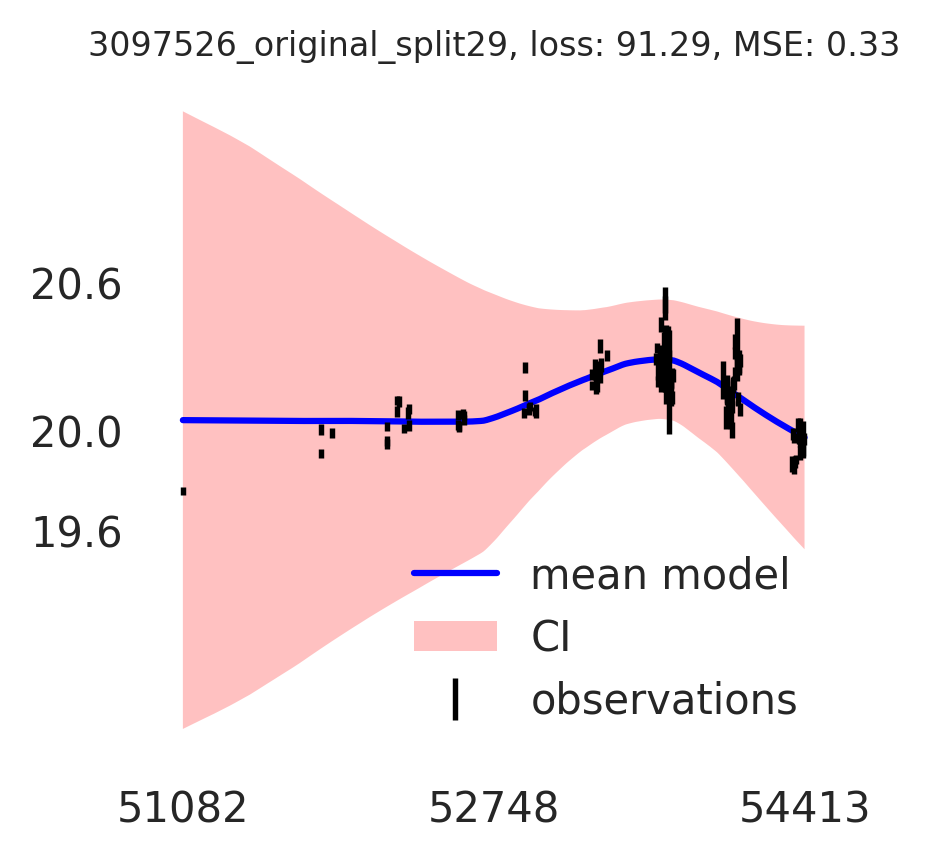

In [83]:
#prediction and plotting val data
valMetrics=pop.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function2, device,tr)

In [84]:
saveval=pop.save_val_metrics(OUTPUT_PATH, valMetrics)#saving the val metrics

From visual inspection, it seems like the package does a great job in fitting the light curve data! The errors on the early MJDs are a bit high though.